In [ ]:
# 벡터 연산
import numpy as np

x = np.arange(-10, 11)
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [ ]:
x[2] # 0부터 시작

-8

In [ ]:
x[0:5]

array([-10,  -9,  -8,  -7,  -6])

In [ ]:
x[x<0]

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1])

In [ ]:
x = np.array([1.0, 2.0, 3.0])
x

array([1., 2., 3.])

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x/3


array([0.33333333, 0.66666667, 1.        ])

In [ ]:
# N차원 배열
a = np.array([[5,7], [9,11]])
a

array([[ 5,  7],
       [ 9, 11]])

In [ ]:
a[0]

array([5, 7])

In [ ]:
a[0,0]

5

In [ ]:
b = np.array([[3,0], [0,6]])
b

array([[3, 0],
       [0, 6]])

In [ ]:
a*b # 단순 곱

array([[15,  0],
       [ 0, 66]])

In [ ]:
y = a.flatten()
y 

array([ 5,  7,  9, 11])

In [ ]:
y > 9

array([False, False, False,  True])

In [ ]:
y[y>9]

array([11])

In [ ]:
# Broadcast : 형상이 다른 배열 계산
a = np.array([[1,2], [3,4]])
b = np.array([10,20])
a*b

array([[10, 40],
       [30, 80]])

In [ ]:
c = 10
a*c

array([[10, 20],
       [30, 40]])

In [ ]:
import pandas as pd # 데이터 프레임 형식으로 저장

nex8 = pd.read_csv('nex8-1.csv', header = 0) 
nex8.head()

,id,sex,age,edu,salary
0,1,m,21,high,150
1,2,f,22,middle,100
2,3,m,33,high,200
3,4,f,33,univ,220
4,5,m,28,high,170


In [ ]:
nex8.head(3)

,id,sex,age,edu,salary
0,1,m,21,high,150
1,2,f,22,middle,100
2,3,m,33,high,200


In [ ]:
nex8.tail(3)

,id,sex,age,edu,salary
7,8,m,32,univ,220
8,9,f,44,middle,370
9,10,m,55,univ,410


In [ ]:
type(nex8)

pandas.core.frame.DataFrame

In [ ]:
nex8.shape

(10, 5)

In [ ]:
nex8 = pd.read_csv('nex8-1.txt', sep = ' ', header = 0) 
nex8.head()

,id,sex,age,edu,salary
0,1,1,21,2,150
1,2,2,22,1,100
2,3,1,33,2,200
3,4,2,33,3,220
4,5,1,28,2,170


In [ ]:
nex8_2 = pd.read_excel('nex8-1.xlsx', header = 0, sheet_name = 0) 
nex8_2.head()

,id,sex,age,edu,salary
0,1,m,21,high,150
1,2,f,22,middle,100
2,3,m,33,high,200
3,4,f,33,univ,220
4,5,m,28,high,170


In [ ]:
nex8.head(2)

,id,sex,age,edu,salary
0,1,1,21,2,150
1,2,2,22,1,100


In [ ]:
cols = ['sex', 'age', 'edu', 'salary'] # 1안
nex8[cols].head(2)

,sex,age,edu,salary
0,1,21,2,150
1,2,22,1,100


In [ ]:
nex8 = nex8.iloc[:,1:] # 2안
nex8.head(2)

,sex,age,edu,salary
0,1,21,2,150
1,2,22,1,100


In [ ]:
nex8['salary'].mean()

243.0

In [ ]:
nex8['salary'].std()

98.21178929006209

In [ ]:
nex8['salary'].median()

220.0

In [ ]:
nex8['salary'].quantile(0.75)

297.5

In [ ]:
nex8.describe()

,sex,age,edu,salary
count,10.000000,10.000000,10.000000,10.000000
mean,1.400000,34.800000,2.200000,243.000000
std,0.516398,10.347302,0.788811,98.211789
min,1.000000,21.000000,1.000000,100.000000
25%,1.000000,29.000000,2.000000,177.500000
50%,1.000000,33.000000,2.000000,220.000000
75%,2.000000,40.500000,3.000000,297.500000
max,2.000000,55.000000,3.000000,410.000000


In [ ]:
group_stat_by_sex = nex8.groupby('sex')['salary'].describe()
group_stat_by_sex

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
1,6.0,241.666667,97.450842,150.0,177.5,210.0,280.0,410.0
2,4.0,245.000000,114.455231,100.0,190.0,255.0,310.0,370.0


In [ ]:
group_stat_by_sex['mean']

sex
1    241.666667
2    245.000000
Name: mean, dtype: float64

In [ ]:
group_stat_by_sex.loc[1]

count      6.000000
mean     241.666667
std       97.450842
min      150.000000
25%      177.500000
50%      210.000000
75%      280.000000
max      410.000000
Name: 1, dtype: float64

In [ ]:
sex_freq = pd.crosstab(index = nex8['sex'], columns = 'count')
sex_freq

col_0,count
sex,
1,6
2,4


In [ ]:
sex_edu_table = pd.crosstab(index = nex8['sex'], columns = nex8['edu'])
sex_edu_table

edu,1,2,3
sex,,,
1,0,3,3
2,2,1,1


In [ ]:
from scipy.stats import chi2_contingency

chi2_contingency(sex_edu_table)

Chi2ContingencyResult(statistic=3.75, pvalue=0.15335496684492844, dof=2, expected_freq=array([[1.2, 2.4, 2.4],
       [0.8, 1.6, 1.6]]))

In [ ]:
import matplotlib.pyplot as plt

sex_freq.index

Int64Index([1, 2], dtype='int64', name='sex')

In [ ]:
sex_freq['count']

sex
1    6
2    4
Name: count, dtype: int64

<BarContainer object of 2 artists>

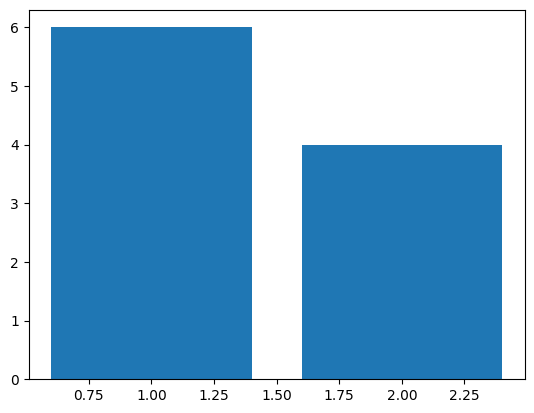

In [ ]:
plt.bar(sex_freq.index, sex_freq['count']) # 막대그래프

<Axes: xlabel='sex'>

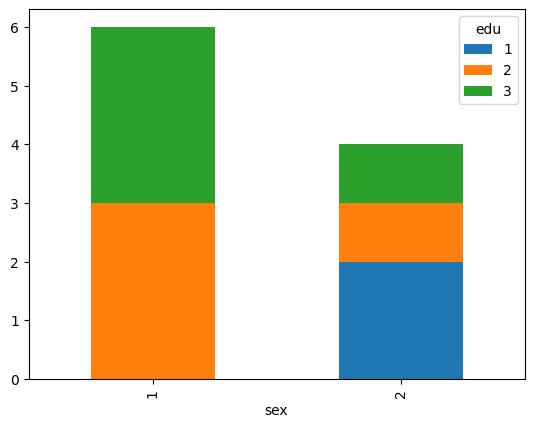

In [ ]:
sex_edu_table.plot.bar(stacked=True)

([<matplotlib.patches.Wedge at 0x7f445ac9d000>,
 [Text(-0.33991877217145816, 1.046162142464278, '1'),
  Text(0.3399188701202255, -1.046162110638781, '2')])

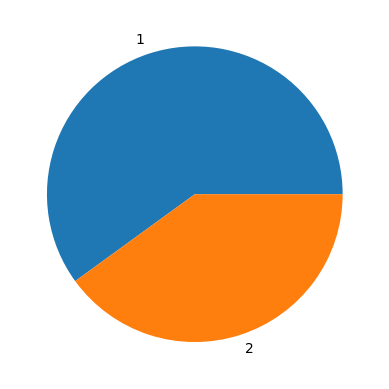

In [ ]:
plt.pie(sex_freq['count'], labels = sex_freq.index) # 원그래프

(array([3., 3., 2., 2.]),
 array([100. , 177.5, 255. , 332.5, 410. ]),
 <BarContainer object of 4 artists>)

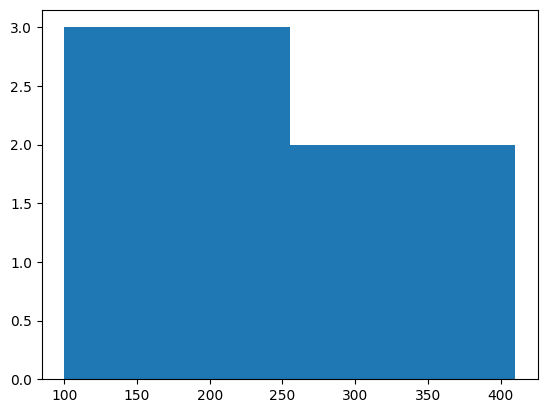

In [ ]:
plt.hist(nex8['salary'], bins = 4) # 히스토그램

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=aa3959af8ff854c93f0f6867232ac1451344c99b8aa2d63f2bf3f1871d43451b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


(<Figure size 750x175 with 1 Axes>, <Axes: >)

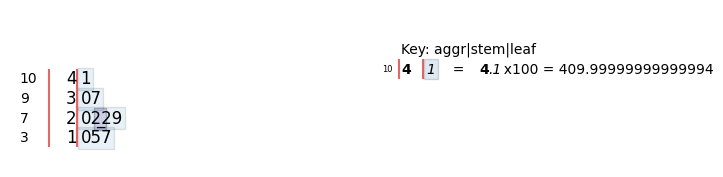

In [ ]:
!pip install stemgraphic
import stemgraphic # 줄기-잎 그림

stemgraphic.stem_graphic(nex8.salary, scale = 100)

<Axes: xlabel='sex', ylabel='salary'>

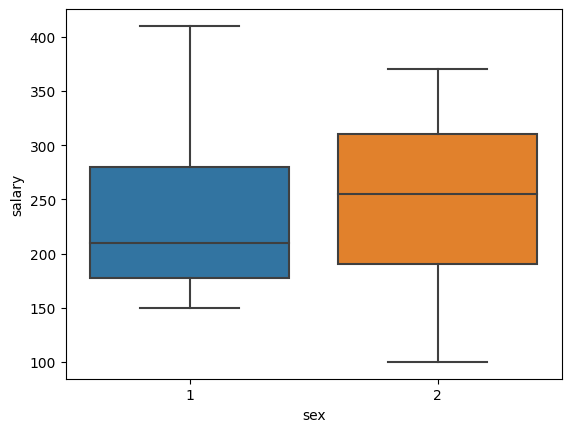

In [ ]:
import seaborn as sns 

sns.boxplot(x = 'sex', y = 'salary', data = nex8) # 상자그림

In [ ]:
colors = np.where(nex8['sex'] == 'm', 'r', 'b')
colors

array(['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], dtype='<U1')

In [ ]:
size = np.where(nex8['sex'] == 'm', 10, 20)
size

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20])

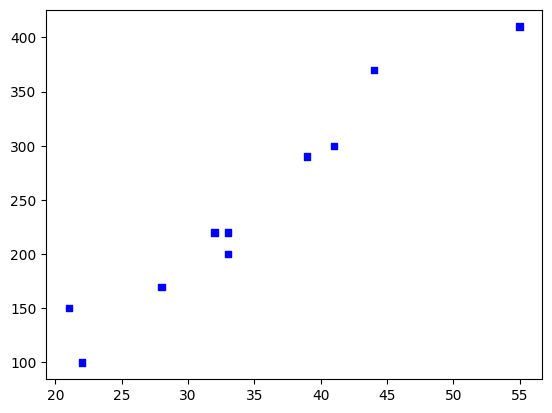

In [ ]:
plt.scatter(nex8.age, nex8.salary, c = colors, s = size, marker = 's') # 산점도

In [ ]:
class Person:
    def __init__(self):
        self.name=input('Name:')

    def disprint(self):
        print(self.name)

customer = []
for i in range(2):
    customer.append(Person())

Name:현욱
Name:신영


In [ ]:
customer

[<__main__.Person at 0x7f4459c83b20>, <__main__.Person at 0x7f4459c82590>]

In [ ]:
customer[0].disprint()

현욱


In [ ]:
x = np.arange(0, 6, 0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9])

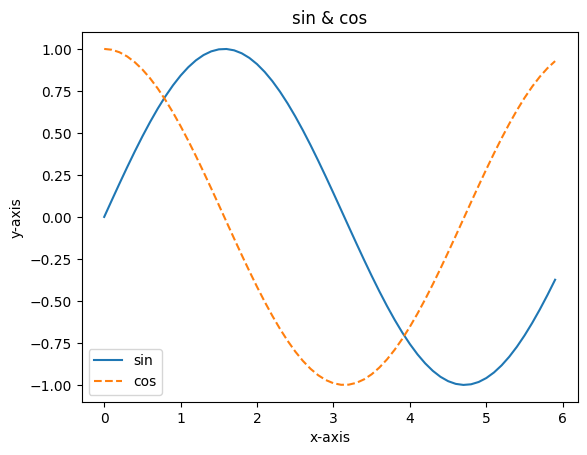

In [ ]:
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label='sin')
plt.plot(x, y2, label='cos', linestyle='--')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('sin & cos')
plt.legend()
plt.show()

0    1
1    2
2    1
3    2
4    1
5    1
6    2
7    1
8    2
9    1
Name: sex, dtype: int64

In [ ]:
# 범주형 변수로 바꾸기
nex8['sex'] = nex8.sex.astype('category')
nex8['edu'] = nex8.edu.astype('category')
nex8.sex

0    1
1    2
2    1
3    2
4    1
5    1
6    2
7    1
8    2
9    1
Name: sex, dtype: category
Categories (2, int64): [1, 2]

In [ ]:
nex8.describe()

,age,salary
count,10.000000,10.000000
mean,34.800000,243.000000
std,10.347302,98.211789
min,21.000000,100.000000
25%,29.000000,177.500000
50%,33.000000,220.000000
75%,40.500000,297.500000
max,55.000000,410.000000
